## AUTO1 Challenge
<br>
Business Case: Predictive Modeling of the Price amount

!["auto1"](auto1.png "auto1")

#### Data Description


This data set consists of three types of entities: 
- The specification of an auto in terms of various characteristics.
- Its assigned insurance risk rating: symboling (-3, -2, -1, 0, 1, 2, 3).
- Its normalized losses in use as compared to other cars: normalized-losses from 65 to 256.

The second rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up or down the scale. Actuarians call this process "symboling". A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe. 

The third factor is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two-door small, station wagons, sports/speciality, etc...), and represents the average loss per car per year. 

#### Class Attributes
 
- make: alfa-romero, audi, bmw, chevrolet, dodge, honda, isuzu, jaguar, mazda, mercedes-benz, mercury, mitsubishi, nissan, peugot, plymouth, porsche, renault, saab, subaru, toyota, volkswagen, volvo 
- fuel-type: diesel, gas. 
- aspiration: std, turbo. 
- num-of-doors: four, two. 
- body-style: hardtop, wagon, sedan, hatchback, convertible. 
- drive-wheels: 4wd, fwd, rwd. 
- engine-location: front, rear. 
- engine-type: dohc, dohcv, l, ohc, ohcf, ohcv, rotor. 
- num-of-cylinders: eight, five, four, six, three, twelve, two. 
- fuel-system: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi. 

### I. Exploratory Data Analysis

In this first section we explore the data, analyse and handle missing values further continuing with quick correlation analysis.

In [1065]:
# loading packages
import numpy as np
import pandas as pd
from pandas import datetime

# data visualization and missing values
import matplotlib.pyplot as plt
import seaborn as sns # advanced vizs
import missingno as msno # missing values
%matplotlib inline

# stats
from statsmodels.distributions.empirical_distribution import ECDF
from sklearn.metrics import mean_squared_error, r2_score

# machine learning
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, LassoCV, ElasticNetCV, ElasticNet
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor
seed = 123

# importing data ( ? = missing values)
data = pd.read_csv("Auto1-DS-TestData.csv", na_values = '?')
data.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [972]:
data.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [973]:
# first glance at the data itself
print("In total: ",data.shape)
data.head(5).append(data.tail(5))

In total:  (205, 26)


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0
204,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,19,25,22625.0


We have quite a small dataset: 205 observations, 26 describing the data features. Talking about describing:

In [259]:
data.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,164.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,35.442168,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


##### The table above tells us few important things:

- Most of the variables' distributions are skewed.
- We have different units of data.
- Occasionaly we miss some datapoints.

### - Missing Values

In this section we will treat missing values.

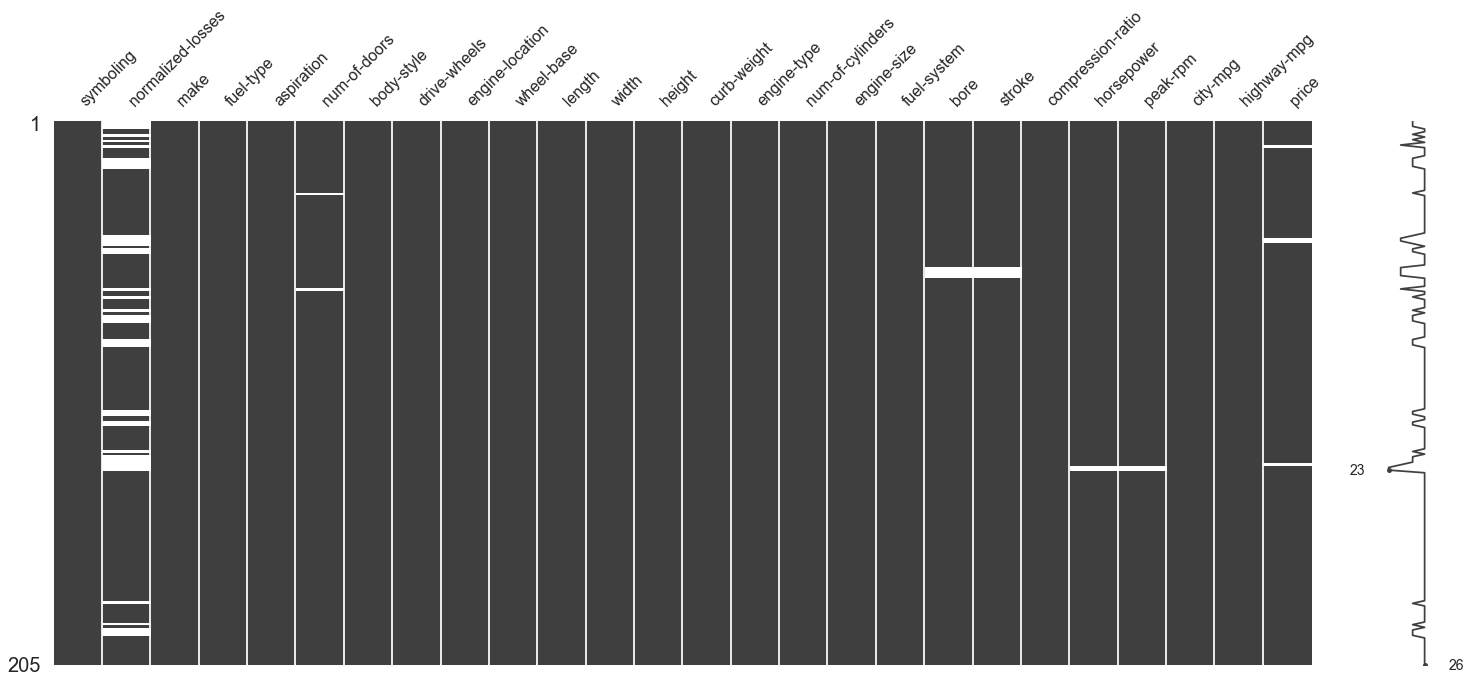

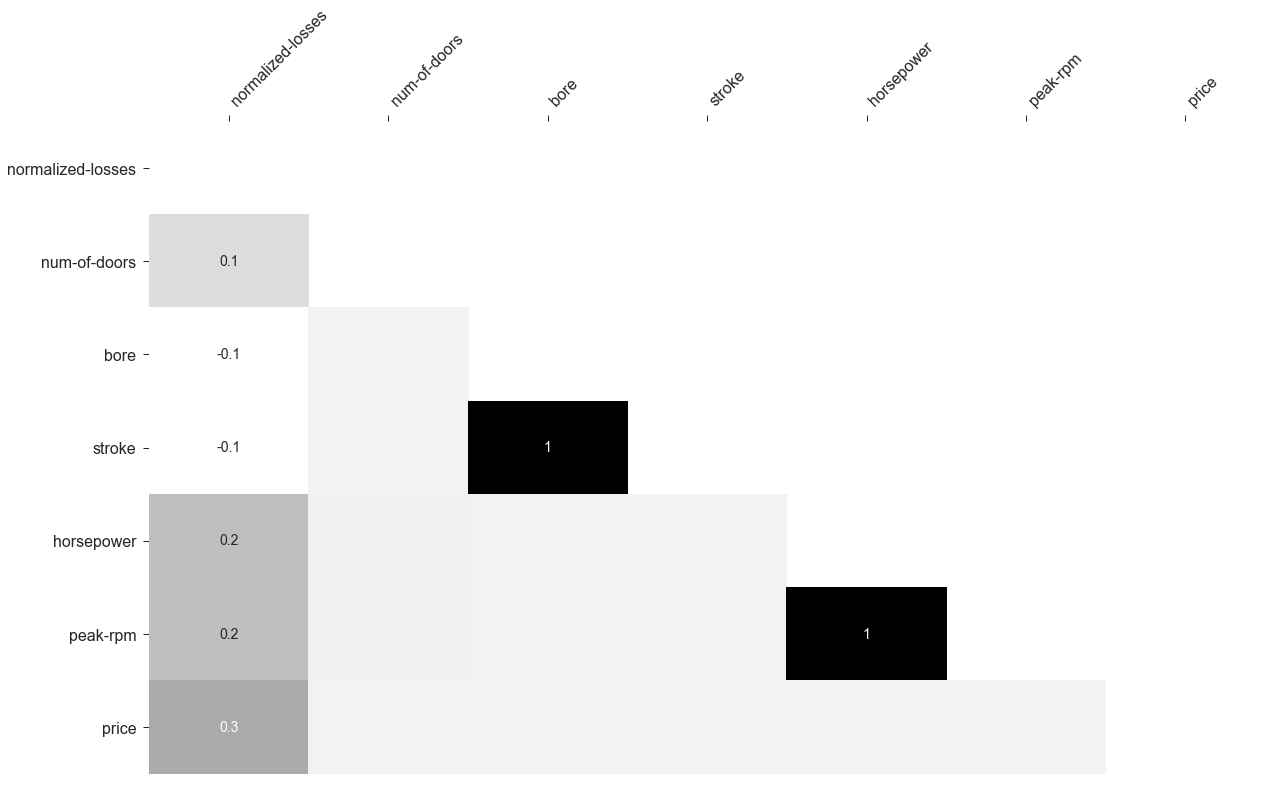

In [806]:
# missing values?
sns.set(style = "ticks")

msno.matrix(data)
msno.heatmap(data, cmap = 'binary')

More or less clean dataset with occasional missing values. However, we should pay more attention to the `normalized-losses` variable as it seems that the former could be correlated to the target variable `price`. 

Twp pairs of variables like `bore` and `strike`, `horsepower` and `peak-rpm` are strongly correlated to each other by the "nullity pattern".

### - Replacement by grouped medians

Reminder: they represent the average loss per car per year.

In [261]:
# missing values in normalied-losses
data[pd.isnull(data['normalized-losses'])].head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,18920.0


We don't see any specific nullity patterns here. Howeve, we can notice that all four missing values for `price` variable correspond to the `NaN` normalized losses. 

Due to the fact that there are only four missing prices we can safely drop them for further analysis. Another approach is needed for `normalized-losses`.

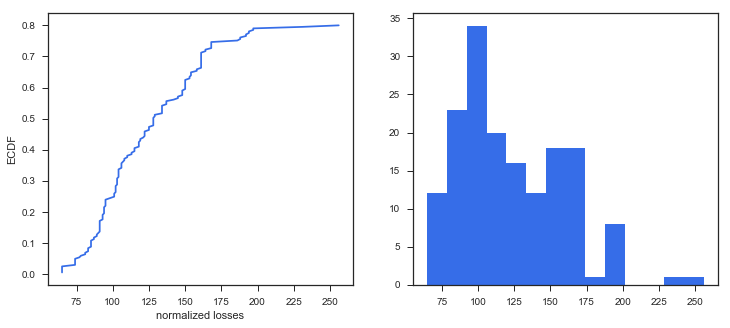

In [1066]:
sns.set(style = "ticks")
plt.figure(figsize = (12, 5)) 
c = '#366DE8'

# ECDF
plt.subplot(121)
cdf = ECDF(data['normalized-losses'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = c);
plt.xlabel('normalized losses'); plt.ylabel('ECDF');

# overall distribution
plt.subplot(122)
plt.hist(data['normalized-losses'].dropna(), 
         bins = int(np.sqrt(len(data['normalized-losses']))),
         color = c);

We see that __80% of normalized losses are below 200__ and about the half of them are below 125. 

We could simply replace NaN with median values of the variable, instead we approach it in slighly another way. We know that these __losses are related to the insurance__ of each car, which in its turn depends on the risk variable `symboling`. So instead of replacing NaNs by the overall median we __replace them by the groups' averages__.

Let's first take a look at the averages:

In [974]:
data.groupby('symboling')['normalized-losses'].describe()

,count,mean,std,min,25%,50%,75%,max
symboling,,,,,,,,
-2,3.0,103.000000,0.000000,103.0,103.00,103.0,103.0,103.0
-1,20.0,85.600000,18.528499,65.0,71.75,91.5,95.0,137.0
0,48.0,113.166667,32.510773,77.0,91.00,102.0,120.5,192.0
1,47.0,128.574468,28.478630,74.0,105.50,125.0,148.0,231.0
2,29.0,125.689655,30.167513,83.0,94.00,134.0,137.0,192.0
3,17.0,168.647059,30.636867,142.0,150.00,150.0,194.0,256.0


In [1067]:
# replacing
data = data.dropna(subset = ['price', 'bore', 'stroke', 'peak-rpm', 'horsepower', 'num-of-doors'])
data['normalized-losses'] = data.groupby('symboling')['normalized-losses'].transform(lambda x: x.fillna(x.mean()))

print('In total:', data.shape)
data.head()

In total: (193, 26)


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,174.384615,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,174.384615,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,128.152174,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.000000,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.000000,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


Much better now. The data sample decreased from 205 to 193, which is not a big deal.

Let's also take a look at the target variable `price`:

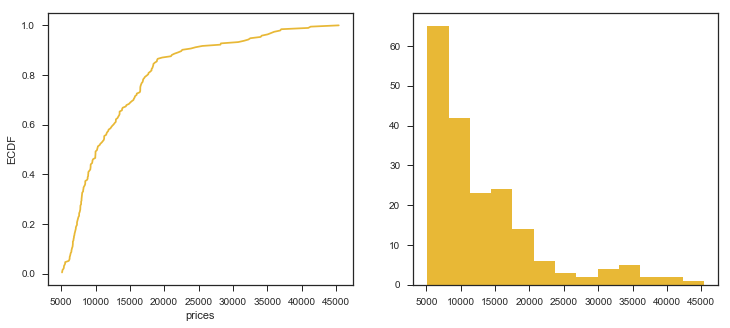

In [1068]:
plt.figure(figsize = (12, 5)) 
c2 = '#E8B836'

# ECDF
plt.subplot(121)
cdf = ECDF(data['price'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = c2);
plt.xlabel('prices'); plt.ylabel('ECDF');

# overall distribution
plt.subplot(122)
plt.hist(data['price'], 
         bins = int(np.sqrt(len(data['price']))),
         color = c2);

The `price` distribution is __right skewed__ with large number of observations on the left of the graph. We can conclude that __most of the car prices, around 80%, are above 18'000$__.

### - Feature selection and correlations

Before encoding classes into numeric values, we can drop few highly correlated to the target variables. We do that in order to avoid large features weights in the model building. 

Data selection (dropping features), however, can be considered as not the best approach. Probably PCA could make more sense here, but that's for later exploration.

In [1069]:
def mosthighlycorrelated(mydataframe, numtoreport):
    # find the correlations
    cormatrix = mydataframe.corr()
    # set the correlations on the diagonal or lower triangle to zero,
    # so they will not be reported as the highest ones:
    cormatrix *= np.tri(*cormatrix.values.shape, k=-1).T
    # find the top n correlations
    cormatrix = cormatrix.stack()
    cormatrix = cormatrix.reindex(cormatrix.abs().sort_values(ascending=False).index).reset_index()
    # assign human-friendly names
    cormatrix.columns = ["FirstVariable", "SecondVariable", "Correlation"]
    return cormatrix.head(numtoreport)

mosthighlycorrelated(data, 10)

,FirstVariable,SecondVariable,Correlation
0,city-mpg,highway-mpg,0.971975
1,engine-size,price,0.888778
2,length,curb-weight,0.882694
3,wheel-base,length,0.879307
4,width,curb-weight,0.867640
5,length,width,0.857368
6,curb-weight,engine-size,0.857188
7,engine-size,horsepower,0.845325
8,curb-weight,price,0.835368
9,horsepower,city-mpg,-0.833615


It seem like __`city_mpg` and `highway-mpg` carry the same information__. We also see that __`engine-size` and `curb-weight`__ are highly correlated to the target variable `price`, which __could lead to unbalanced model fitting__. Size variables __`length`, `width` and `height` could be probably transformed__ into one variable `volume` equal to $ length * height * width $.

In [1070]:
data['volume'] = data.length * data.width * data.height

data.drop(['width', 'length', 'height', 'engine-size',
           'curb-weight', 'city-mpg'], 
          axis = 1, # 1 for columns
          inplace = True) # assigns to the wm dataframe

In [1071]:
# new variables
data.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'engine-type', 'num-of-cylinders', 'fuel-system', 'bore',
       'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'highway-mpg',
       'price', 'volume'],
      dtype='object')

Let's take a look at the `price` and variable that are correlated to the target variable:

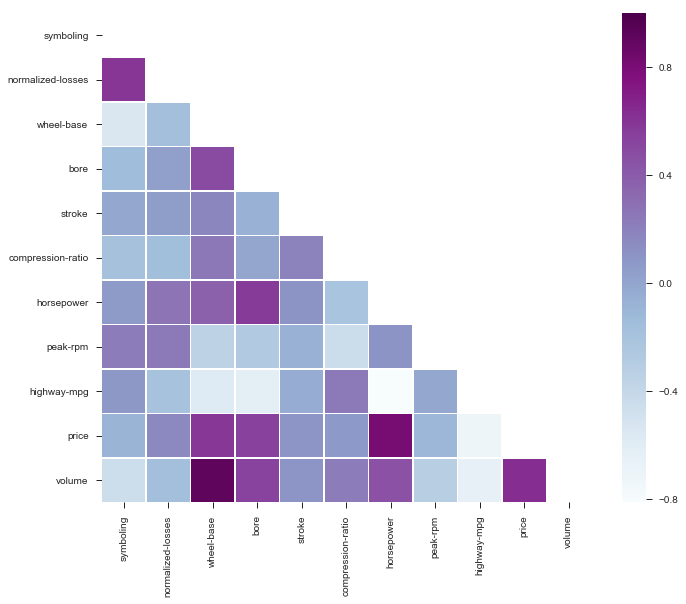

In [1072]:
# Compute the correlation matrix 
corr_all = data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr_all, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize = (11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_all, mask = mask,
            square = True, linewidths = .5, ax = ax, cmap = "BuPu")      
plt.show()

It seems like `price` has a strong linear correlation with variables `wheel-base`, `length`, `engine-size`, `bore` and `horsepower`. 

If we plotted the scatters for every continious variable in the dataset against each other, we would see this:

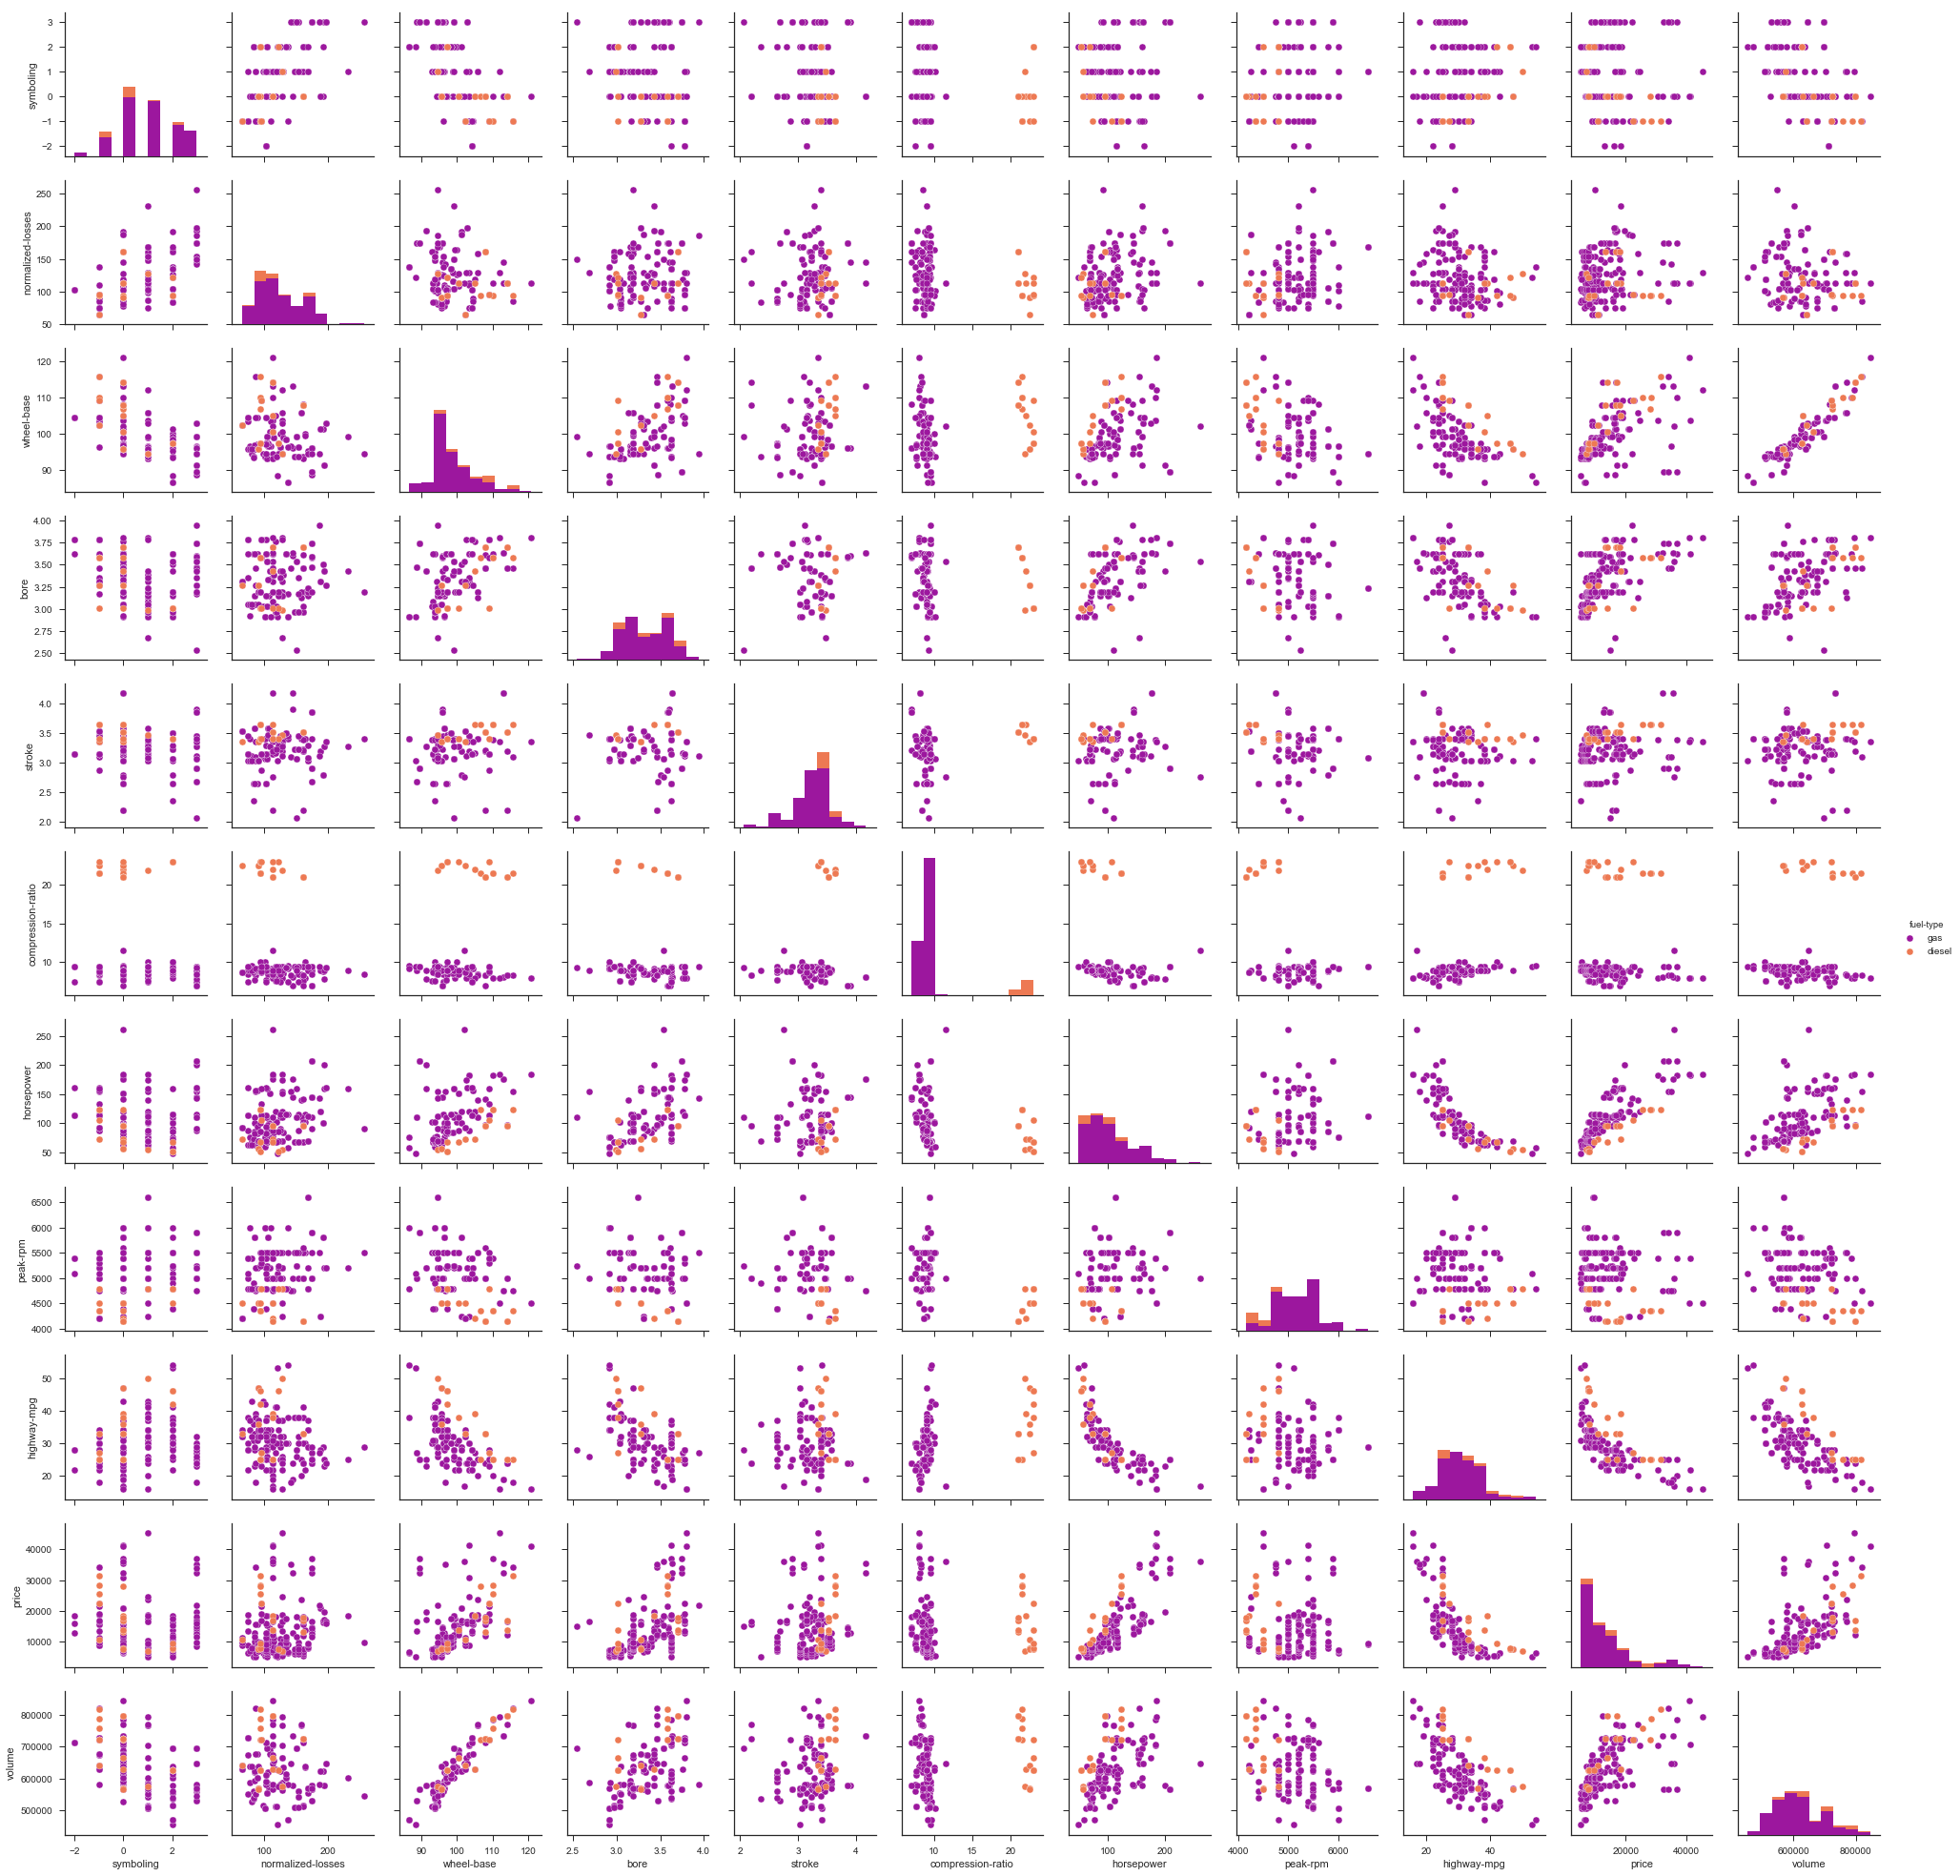

In [1073]:
sns.pairplot(data, hue = 'fuel-type', palette = 'plasma')

The graph above not only reveal present trends in the dataset but also shows the form of each (continious) distribution. Some of them resemble the "bell-curve", like `highway-mpg`, while others are strongly skewed.

We can also see __formed clusters for `compression-ratio`__ based on the `fuel-type`.

Out of curiosity, let's take a closer look at the relationship between `price` and `horsepower` variables. 

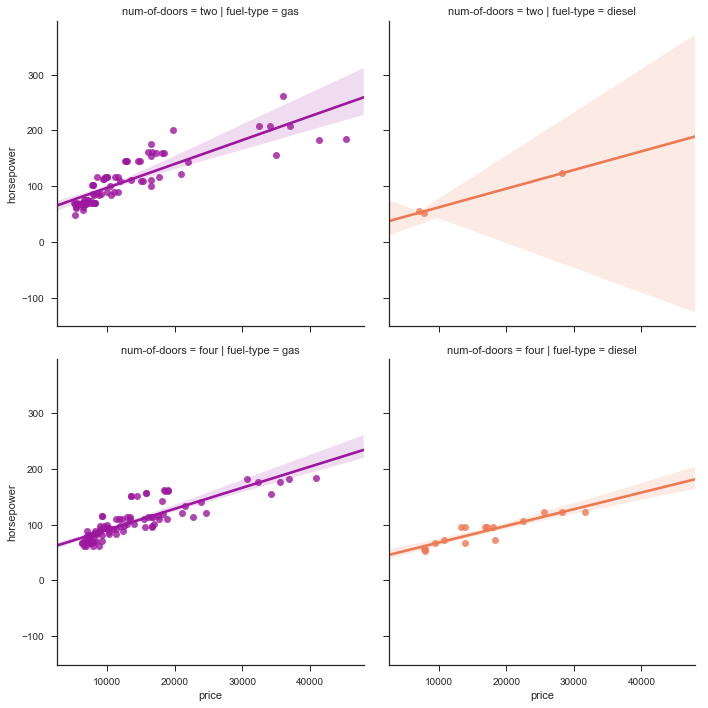

In [1074]:
sns.lmplot('price', 'horsepower', data, 
           hue = 'fuel-type', col = 'fuel-type',  row = 'num-of-doors', 
           palette = 'plasma', 
           fit_reg = True);

Indeed, for every level of `fuel-type` and `num-of-doors` variables we see that an increase in horsepowers of a car is associated with a proportional increase in its price. 

### II. Predictive Modeling

In this section we compare two different regression models. Their choice was essentilay based on the sample size of the data, regularization technique (for L1) and robustness.

__Lasso Regression__

This model solves a regression model where the loss function is the linear least squares function and regularization is given by the l1-norm. The choice of this model was obvious enough: __we have too many features and most of them should be zero-out__.

__Random Forest Regression__

Random Forest Regressor is a meta-estimator that fits a number of classifying decision trees on various sub-samples of the dataset and use averaging to improve the predictive accuracy and control over-fitting. It is one of the most popular machine learning algorithms and widely used by the community. Even though, it is usually used for classification problems, it works great for regression tasks too. 

### - Preprocessing

If a feature has a variance that is much larger than others, it might dominate the objective function and make the estimator unable to learn from other features correctly as expected. That is why we need to scale the data first. 

In [1075]:
# target and features
target = data.price

regressors = [x for x in data.columns if x not in ['price']]
features = data.loc[:, regressors]

num = ['symboling', 'normalized-losses', 'volume', 'horsepower', 'wheel-base',
       'bore', 'stroke','compression-ratio', 'peak-rpm']

# scale the data
standard_scaler = StandardScaler()
features[num] = standard_scaler.fit_transform(features[num])

# glimpse
features.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,engine-type,num-of-cylinders,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,highway-mpg,volume
0,1.78685,1.477685,alfa-romero,gas,std,two,convertible,rwd,front,-1.682379,dohc,four,mpfi,0.513027,-1.808186,-0.288273,0.198569,-0.213359,27,-1.168294
1,1.78685,1.477685,alfa-romero,gas,std,two,convertible,rwd,front,-1.682379,dohc,four,mpfi,0.513027,-1.808186,-0.288273,0.198569,-0.213359,27,-1.168294
2,0.16397,0.144710,alfa-romero,gas,std,two,hatchback,rwd,front,-0.720911,ohcv,six,mpfi,-2.394827,0.702918,-0.288273,1.334283,-0.213359,26,-0.422041
3,0.97541,1.178276,audi,gas,std,four,sedan,fwd,front,0.142781,ohc,four,mpfi,-0.517605,0.480415,-0.036204,-0.039139,0.856208,30,0.169527
4,0.97541,1.178276,audi,gas,std,four,sedan,4wd,front,0.077596,ohc,five,mpfi,-0.517605,0.480415,-0.540341,0.304217,0.856208,22,0.193551


### - Feature Encoding

In order to use catagorical variables in the model fitting we need to encode them into dummies.

In [1076]:
# categorical vars
classes = ['make', 'fuel-type', 'aspiration', 'num-of-doors', 
           'body-style', 'drive-wheels', 'engine-location',
           'engine-type', 'num-of-cylinders', 'fuel-system']

# create new dataset with only continios vars 
dummies = pd.get_dummies(features[classes])
features = features.join(dummies).drop(classes, 
                                       axis = 1)

# new dataset
print('In total:', features.shape)
features.head()

In total: (193, 65)


,symboling,normalized-losses,wheel-base,bore,stroke,compression-ratio,horsepower,peak-rpm,highway-mpg,volume,...,num-of-cylinders_six,num-of-cylinders_three,num-of-cylinders_twelve,fuel-system_1bbl,fuel-system_2bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,1.78685,1.477685,-1.682379,0.513027,-1.808186,-0.288273,0.198569,-0.213359,27,-1.168294,...,0,0,0,0,0,0,0,1,0,0
1,1.78685,1.477685,-1.682379,0.513027,-1.808186,-0.288273,0.198569,-0.213359,27,-1.168294,...,0,0,0,0,0,0,0,1,0,0
2,0.16397,0.144710,-0.720911,-2.394827,0.702918,-0.288273,1.334283,-0.213359,26,-0.422041,...,1,0,0,0,0,0,0,1,0,0
3,0.97541,1.178276,0.142781,-0.517605,0.480415,-0.036204,-0.039139,0.856208,30,0.169527,...,0,0,0,0,0,0,0,1,0,0
4,0.97541,1.178276,0.077596,-0.517605,0.480415,-0.540341,0.304217,0.856208,22,0.193551,...,0,0,0,0,0,0,0,1,0,0


In [1077]:
# split the data into train/test set
X_train, X_test, y_train, y_test = train_test_split(features, target, 
                                                    test_size = 0.3, # 30% for the evaluation set
                                                    random_state = seed)

print("Train", X_train.shape, "and test", X_test.shape)

Train (135, 65) and test (58, 65)


### - Lasso

As it usually goes, we use cross validation to decrease over-fitting and generalize on the unseen data.

CV results: 0.826897171636 225.757779669


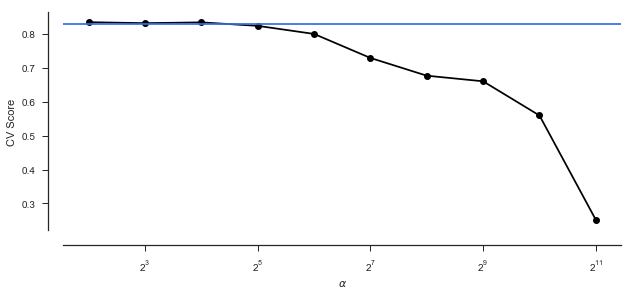

In [1078]:
# logarithmic scale: log base 2
# high values to zero-out more variables
alphas = 2. ** np.arange(2, 12)
scores = np.empty_like(alphas)

for i, a in enumerate(alphas):
    lasso = Lasso(random_state = seed)
    lasso.set_params(alpha = a)
    lasso.fit(X_train, y_train)
    scores[i] = lasso.score(X_test, y_test)
    
lassocv = LassoCV(cv = 10, random_state = seed)
lassocv.fit(features, target)
lassocv_score = lassocv.score(features, target)
lassocv_alpha = lassocv.alpha_

plt.figure(figsize = (10, 4))
plt.plot(alphas, scores, '-ko')
plt.axhline(lassocv_score, color = c)
plt.xlabel(r'$\alpha$')
plt.ylabel('CV Score')
plt.xscale('log', basex = 2)
sns.despine(offset = 15)

print('CV results:', lassocv_score, lassocv_alpha)

It's already a good result: R squared of 0.82. Let's take a look at the features contributing to the model.

Lasso picked 13 features and eliminated the other 52 features.


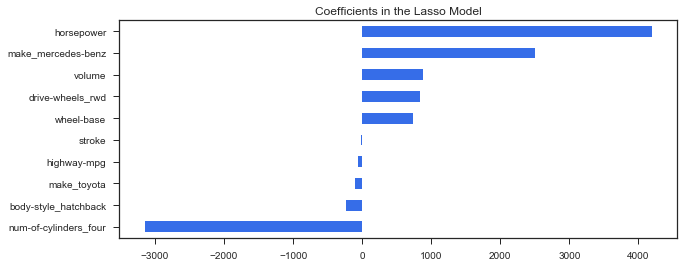

In [1115]:
# lassocv coefficients
coefs = pd.Series(lassocv.coef_, index = features.columns)

# prints out the number of picked/eliminated features
print("Lasso picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features.")

# takes first and last 10
coefs = pd.concat([coefs.sort_values().head(5), coefs.sort_values().tail(5)])

plt.figure(figsize = (10, 4))
coefs.plot(kind = "barh", color = c)
plt.title("Coefficients in the Lasso Model")
plt.show()

In [1080]:
model_l1 = LassoCV(alphas = alphas, cv = 10, random_state = seed).fit(X_train, y_train)
y_pred_l1 = model_l1.predict(X_test)

model_l1.score(X_test, y_test)

0.83307445226244159

We get higher score on the test than on the train set, which shows that the model can propbably __generalize well on the unseen data__.

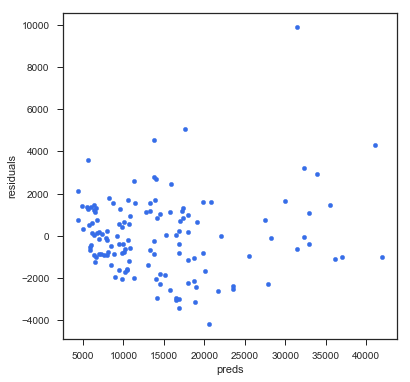

In [1113]:
# residual plot
plt.rcParams['figure.figsize'] = (6.0, 6.0)

preds = pd.DataFrame({"preds": model_l1.predict(X_train), "true": y_train})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals", kind = "scatter", color = c)

The residual plot looks more or less good: there is an aggregation of residuals on the bottom left of the graph, so the model could be biased to a certain degree, but not particulary high. 

In [1082]:
def MSE(y_true,y_pred):
    mse = mean_squared_error(y_true, y_pred)
    print('MSE: %2.3f' % mse)
    return mse

def R2(y_true,y_pred):    
    r2 = r2_score(y_true, y_pred)
    print('R2: %2.3f' % r2)     
    return r2

MSE(y_test, y_pred_l1); R2(y_test, y_pred_l1);

MSE: 3870543.789
R2: 0.833


In [1083]:
# predictions
d = {'true' : list(y_test),
     'predicted' : pd.Series(y_pred_l1)
    }

pd.DataFrame(d).head()

,predicted,true
0,8698.454622,8499.0
1,16848.107734,17450.0
2,11050.616354,9279.0
3,10177.257093,7975.0
4,6505.098638,6692.0


We see that the values are not that far, but there's certainly a room for improvement.

### - Random Forest Regressor

- `n_estimators`: the number of trees to build before taking the maximum voting or averages of predictions. Higher number of trees gives better performance. In this case we take __`n_estimators = 1000`__.


- `max_features`: the number of features to consider when looking for the best split. We already now that the percentage of __relevant features is between 10-20%__, so we take this range. 


- `min_samples_leaf` : the minimum sample leaf size is highly dependent on the sample size. We will leave it at the default value of 2.


- `max_depth`: the maximum depth of the tree also depends on the sample size. More data - bigger the depth. Here, in the contrary, we have quite a small dataset so the __range between 5 and 10 with a step of 1__ will be enough.

In [1108]:
rfr = RandomForestRegressor(n_estimators = 1000, random_state = seed)

param_grid = {'max_depth': list(range(5, 10, 1)),
              'max_features': [0.05, 0.1, 0.15, 0.2]}

grid_search = GridSearchCV(rfr, param_grid, 
                           n_jobs = -1, # no restriction on processor usage
                           cv = 5) # 5 fold cv
grid_search.fit(X_train, y_train)

print('Best combination:', grid_search.best_params_);

Best combination: {'max_depth': 9, 'max_features': 0.1}


In [1109]:
# with best parameters for 1000 estimators
rfr = RandomForestRegressor(max_features = 0.1, max_depth = 9, 
                            n_estimators = 1000, random_state = seed)

score_train = cross_val_score(rfr, X_train, y_train, cv = 5).mean()
score_test = cross_val_score(rfr, X_test, y_test, cv = 5).mean()

print("Score with the train set = %.2f" % score_train)

Score with the train set = 0.87


In [1110]:
model_rf = rfr.fit(X_train, y_train)

# predictions
y_pred_rf = model_rfr.predict(X_test)

d = {'true' : list(y_test),
     'predicted' : pd.Series(y_pred_rf)
    }

pd.DataFrame(d).head()

,predicted,true
0,8777.281670,8499.0
1,17786.619402,17450.0
2,10266.155061,9279.0
3,9772.243848,7975.0
4,7308.868503,6692.0


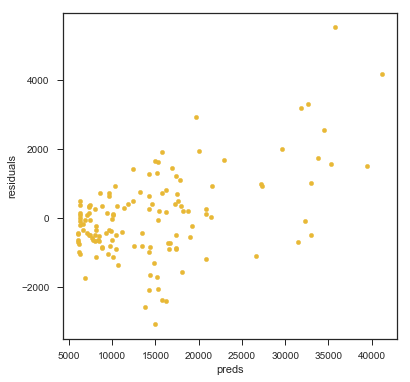

In [1118]:
# residual plot
plt.rcParams['figure.figsize'] = (6.0, 6.0)

preds_rf= pd.DataFrame({"preds": model_rf.predict(X_train), "true": y_train})
preds_rf["residuals"] = preds_rf["true"] - preds_rf["preds"]
preds_rf.plot(x = "preds", y = "residuals", kind = "scatter", color = c2)

Almost identical residual plot. Let's also print out the `MSE` and `R2` metrics:

In [1111]:
MSE(y_test, y_pred_rf); R2(y_test, y_pred_rf);

MSE: 3443289.548
R2: 0.852


Overall, Ranfom Forest shows slightly better performance in terms of both metrics. Let's see which features contributed to the result:

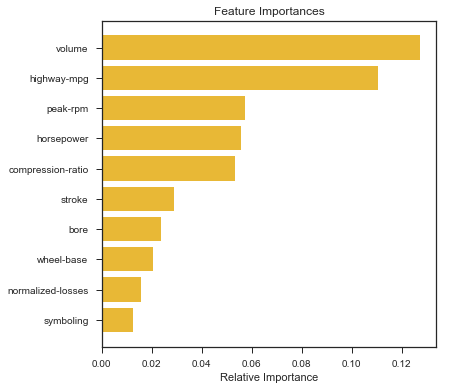

In [1116]:
# first ten importances 
importances = model_rf.feature_importances_[:10]
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color = c2, align = 'center')
plt.yticks(range(len(indices)), features)
plt.xlabel('Relative Importance')
plt.show()

The list of most contributing features stays more or less the same for both models: `horsepower` and `volume` there. However, __Random Forest took `volume` and `highway-mpg` as the most important features with relative importance of 0.14 and 0.12 respectively__. Meanwhile, Lasso picked `volume` as its third feature and `highway-mpg` as the tenth.

### Summary

- We analysed the data by plotting ECDF and distributions
- Handled missing values in `normalized-losses` by grouped medians replacement
- Visualized and listed highly correlated features 
- Performed data selection and transformation
- Preprocessed the data and encoded the classes
- Fitted L1 Regression and Random Forest for Regression models using cross-validation, grid-

### Final Thoughts and the Room for improvement

We achieved pretty good results for both models:
- Lasso with `MSE: 3870543.789` and `R2: 0.833`.
- Random Forest: `MSE: 3443289.548` and `R2: 0.852`.

Obvisously enough, __given more data both models would show better performance__. In terms of preprocessing, another approach could be taked for data transformation - __Principal Component Analysis__, which uses an orthogonal transformation to convert a set of observations of possibly correlated variables into a set of values __forming new combined features__.

Further PCA data could be fitted to __XGboost regression model__, ideal for medium-large dataset and so widely used on Kaggle. 

Finally we could also perform a __stacked generalization on the base models from this notebook__ using the predictions from both as the inputs and the true values as the outputs, and train a higher level learner.

Thank you for reading!

Elena

[datageekette](datageekette.com)